<a href="https://colab.research.google.com/github/kevGamer09-glitch/TAREA-3/blob/main/redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XORNUMPY

In [ ]:
#PRIMERO NECESITAREMOS DE LA LIBRERIA NUMPY
import numpy as np

In [ ]:
#DESPUES GAREGAMOS LO DATOS DONDE RADICAN X E Y OSEA ENTRADAS Y ETIQUETAS
# Datos de entrada y salida
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [ ]:
#La red tiene una capa de entrada con dos neuronas, que representan las dos características de entrada. Luego tiene una capa oculta con cuatro neuronas y, por último, una capa de salida con una sola neurona


In [ ]:
# Definimos pesoos y sesgos
input_neurons = X.shape[1]  # Number of features in the input data
hidden_neurons = 4  # Number of neurons in the hidden layer (can be adjusted)
output_neurons = y.shape[1] # Number of neurons in the output layer

In [ ]:
#Este código define dos funciones que se usan mucho en redes neuronalesLa función sigmoide.Su derivada, que se necesita para el proceso de aprendizaje (backpropagation).
# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

los hiperparametros


In [ ]:
#Los hiperparámetros son valores que tú eliges antes de entrenar una red neuronalNo los aprende la red por sí sola, pero afectan mucho cómo y qué tan bien aprende.
# Hiperparámetros
learning_rate = 0.1
epochs = 10000

In [ ]:
#Esto crea un bucle que se repite tantas veces como indique epochs (en este caso, 10 000 veces).Cada repetición es una “época” de entrenamiento.
# Entrenamiento de la red neuronal
for epoch in range(epochs):
    # Paso hacia adelante (Forward pass)
    input_layer = X
    hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Cálculo del error
    error = y - output
    mse = np.mean((error) ** 2)
    # Mostrar el progreso
    if (epoch + 1) % 100 == 0:
        _mse = "{:.20f}".format(mse)
        print(f'Época {epoch + 1}, Loss function (MSE): {_mse}')

    # Retropropagación (Backpropagation)
    d_output = error * sigmoid_derivative(output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Actualización de pesos y sesgos
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += input_layer.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

In [ ]:
#en este se toman los datos de entrada,multiplica las entradas por los pesos ,aplica la funcion signoide,multiplica la capa oculta y se aplica otra vez la funcion signoide
input_layer = X
hidden_layer_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predictions = sigmoid(output_layer_input)

print("Resultados finales:")
for i in range(0, len(X)):
    print(f"Input: {X[i]}, Target: {y[i]}, Predictions {predictions[i]}")

In [ ]:
#Esta parte evalúa el rendimiento final de la redmide cuánto se equivoca, en promedio, al hacer sus predicciones.mse = ((y - predictions) ** 2).mean()print(f"Error Cuadrático Medio (MSE): {mse}")


XOR

In [ ]:
#VOLVEMOS A UTILIZAR NUMPY PARO LOS DATOS
import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


In [ ]:
#Este bloque define la arquitectura de la red tiene Entrada de 2 valores,una capa oculta de 4 neuronas con ReLU

Salida: 1 neurona con sigmoide
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])


compilacion del modelo

In [ ]:
#Decide cómo se actualizarán los pesos (Adam) y define la velocidad de aprendizaje (learning_rate)
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
#agregamos el modelo utilizando el optimisador adam
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#Este código entrena un modelo de Keras usando los datos X y y durante 50 epochs, sin mostrar información en pantalla, y guarda el historial del entrenamiento (pérdida y métricas) en la variable history.
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


In [ ]:
#ste código grafica la evolución de la pérdida (loss) durante el entrenamiento del modelo. Usa matplotlib para dibujar cómo cambió la pérdida en cada época, con título y etiquetas en los ejes, y muestra la gráfica en pantalla.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [ ]:
#Este fragmento evalúa el modelo con los datos X y y, calculando la pérdida (loss) y la precisión (accuracy) en ese conjunto, y luego imprime esos valores en pantalla.
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


In [ ]:
#Este fragmento genera predicciones del modelo para los datos X, las convierte a 0 o 1 usando un umbral de 0.5, y luego imprime cada entrada junto con su predicción correspondiente.
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


Clasificacion de la flor del iris

In [ ]:
#primero cargamos el data set
#Este fragmento importa el conjunto de datos Iris desde scikit-learn y lo carga en la variable iris, que contiene las características, etiquetas y metadatos de las flores del dataset.
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
#Este comando muestra las claves del diccionario
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
#Este comando muestra la descripción completa del dataset Iris, incluyendo información sobre las características, clases y estructura de los datos.
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
#muestra clases de flores ,etiquetas,datos de entrada y caracteristicas dataset
iris.target_names
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#convierte los datos del dataset Iris en un DataFrame de pandas llamado iris_df, usando los nombres de las características como columnas, y permite ver los datos en forma de tabla.
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# genera estadísticas descriptivas del DataFrame iris_df, como la media, desviación estándar, mínimo, máximo y percentiles de cada característica.
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


PROCESAMIENTO DE DATOS

In [ ]:
# DEFINE X Y CONVIERTE ETIQUETAS NUMERICAS

X = iris_df
y = pd.get_dummies(iris.target).values


In [ ]:
#Este fragmento divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


In [ ]:
#Estos comandos muestran las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [ ]:
#Este fragmento estandariza los datos para que cada característica tenga media 0 y desviación estándar 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


multicapa neuronal roja

In [ ]:
#Este fragmento define una red neuronal secuencial con Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#complilacion del modelo
# crea un optimizador Adam con una tasa de aprendizaje de 0.001, que se usará para actualizar los pesos del modelo durante el entrenamiento.
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
#Este fragmento compila el modelo definiendo optimizador
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#entrenado al modelo
#Este fragmento entrena el modelo con los datos de entrenamiento durante 10 epochs, usando un batch size de 1, y evalúa su rendimiento en los datos de prueba
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5893 - loss: 0.8926 - val_accuracy: 0.9000 - val_loss: 0.3860
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.3997 - val_accuracy: 0.9333 - val_loss: 0.2498
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.3112 - val_accuracy: 0.9667 - val_loss: 0.1677
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.2159 - val_accuracy: 1.0000 - val_loss: 0.1126
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9378 - loss: 0.1380 - val_accuracy: 1.0000 - val_loss: 0.0913
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.1100 - val_accuracy: 1.0000 - val_loss: 0.0811
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.1520 - val_accuracy: 1.0000 - val_loss: 0.0535
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9356 - loss: 0.0993 - val_accuracy: 0.

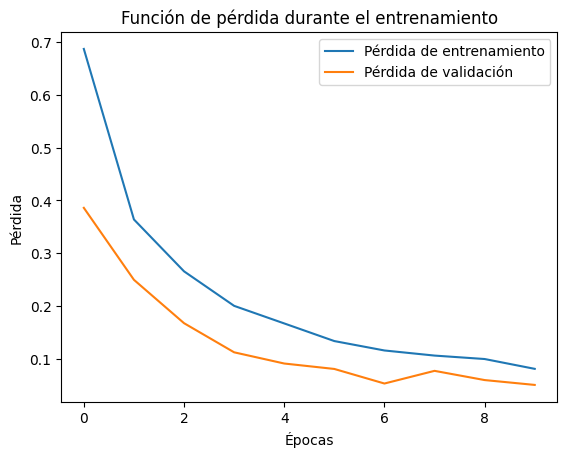

In [ ]:
#grafica de perdida
#Este fragmento grafica la evolución de la pérdida durante el entrenamiento, mostrando tanto la pérdida de entrenamiento como la pérdida de validación a lo largo de las épocas, con etiquetas y leyenda.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [ ]:
#evaluacion
#Este fragmento evalúa el modelo en los datos de prueba (X_test, y_test) y luego imprime la pérdida y la precisión obtenidas.
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 1.0000 - loss: 0.0508
Loss: 0.050829824060201645, Accuracy: 1.0


In [ ]:
#prediccion
#Este fragmento compara las predicciones del modelo con las clases reales en los datos de prueba, creando un DataFrame que muestra:
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


In [ ]:
#calculo de matriz
#Este fragmento evalúa el rendimiento del modelo calculando predicciones matriz y sencibilidad
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = model.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)


In [ ]:
#visualizacion de matriz
#Este fragmento visualiza la matriz de confusión con colores y muestra la sensibilidad (recall) de cada clase, indicando qué tan bien el modelo identifica correctamente cada tipo de flor.
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')


Clasificación de un candidato a un empleo

In [1]:
#primero utilizamos pandas y numpy
#Este código genera un dataset sintético (ficticio) con distintas habilidades y sus niveles numéricos.
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [2]:
#Este bloque calcula promedios de habilidades y genera una etiqueta que clasifica cada individuo como apto o no apto según su puntaje total.
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [3]:
#aqui se divide los datos en entrenamiento y prueba, y normaliza los valores numéricos para que todos los atributos estén en una escala comparable antes de entrenar el modelo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RED NEURONAL

In [4]:
#crea y prepara una red neuronal densa con tres capas ocultas para clasificar entre dos clases apto y no apto usando el optimizador Adam y midiendo su precisión.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ENTRETENIMIENTO

In [5]:
# se le pide que entrene el modelo neuronal durante 50 épocas, en pequeños lotes de 8 muestras, y guarda en history los datos del progreso del aprendizaje.
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7483 - loss: 0.4609 - val_accuracy: 0.9460 - val_loss: 0.1177
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9670 - loss: 0.0801 - val_accuracy: 0.9700 - val_loss: 0.0713
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0500 - val_accuracy: 0.9650 - val_loss: 0.0735
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9813 - loss: 0.0433 - val_accuracy: 0.9670 - val_loss: 0.0796
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0272 - val_accuracy: 0.9690 - val_loss: 0.0727
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0332 - val_accuracy: 0.9690 - val_loss: 0.0801
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0189 - val_accuracy: 0.9700 - val_loss: 0.0732
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0152 - val_accuracy: 0.

EVALUACION

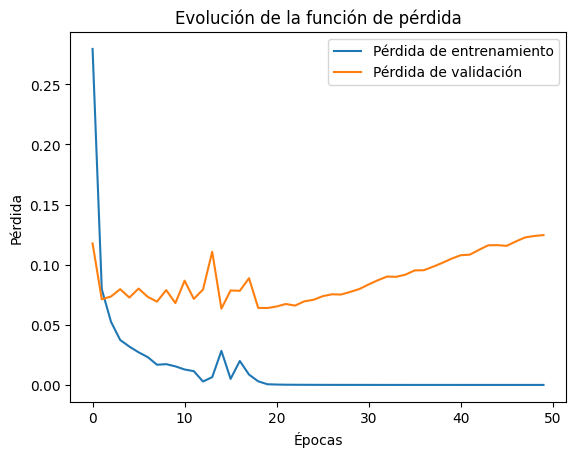

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9825 - loss: 0.0993

🔹 Loss: 0.1246  |  Accuracy: 0.9800


In [6]:
# aqui muestra gráficamente el aprendizaje del modelo y reporta su desempeño final, indicando qué tan bien predice sobre datos nuevos.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

MATRIZ D

In [ ]:
# en este caso se evalúa el modelo clasificatorio mostrando su matriz de confusión y los recalls por clase, lo que ayuda a entender si el modelo predice mejor una clase que otra.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

Evaluar un nuevo candidato

In [7]:
# se simula la evaluación de un nuevo perfil usando el modelo entrenado: toma sus habilidades, las normaliza, obtiene una predicción y muestra si el modelo lo considera apto o no.
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Evaluación de nuevo candidato:
Resultado: Apto


predicción de la eficiencia del combustible

#CONJUNTO DE DATOS

In [ ]:
# primero empesamos instalando inumlrepo
pip install ucimlrepo


In [ ]:
#descarga automáticamente el dataset Auto MPG del repositorio UCI y lo separa en variables independientes X y variable dependiente Y listas para análisis o  el modelado
!from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [ ]:
#simplemente qui se mmuestra el conjunto x
X.head()


In [ ]:
#a continuacion se muestra el conjunto y
y.head()


PROCESAMIENTO DE DATOS

In [ ]:
#aqui solo se muestran las variaciones de X
X.info()


In [ ]:
# y qui variaciones de Y
y.info()


In [ ]:
# secombina las características X y el objetivo Y en un solo DataFrame y elimina las filas con valores faltantes.
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [ ]:
# aqui se muestra variaciones nulas del conjunto
df.info()


In [ ]:
#separa nuevamente el dataFrame en características x y objetivo y usando 'mpg' como variable objetivo.
X = df.drop('mpg', axis=1)
y = df['mpg']


In [ ]:
# se dividen los datos en conjuntos de entrenamiento 80% y prueba 20% para poder entrenar y evaluar modelos de manera independiente.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [ ]:
# aqui se muestran las dimensiones de los conjuntos de entrenamiento y prueba, permitiendo verificar cuántas filas y columnas tiene cada uno.
print(X_train.shape)
print(X_test.shape)


In [ ]:
# se normalizan las características usando StandardScaler ajustando la media a 0 y la desviación estándar a 1  para que los datos de entrenamiento y prueba estén en la misma escala.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


MULTICAPA ROJA

In [ ]:
#  se crea una red neuronal densa con tres capas ocultas 64, 32 y 16 neuronas, activación relu  y una capa de salida de una neurona para predecir valores continuos adecuada para regresión.
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


In [ ]:
#una vez creado el optimizador adam con una tasa de aprendizaje de 0.001 que se usará para ajustar los pesos de la red durante el entrenamiento.
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
# aqui la red neuronal define optimizador la funcion de perdida y metrica
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)


ENTRENAMIENTO DEL MODELO

In [ ]:
# se entrena la red neuronal durante 5 épocas con lotes de 1 muestra, usando los datos de entrenamiento y validación, y guarda la evolución del error y métricas
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


CREACION DE LA GRAFICA DE FUNCION DE PERDIDO

In [ ]:
# creacion de grafica la evolución de la función de pérdida durante el entrenamiento y validación, permitiendo visualizar cómo mejora el modelo a lo largo de las épocas.
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


EVALUACION

In [ ]:
# se evalúa el modelo con los datos de prueba y muestra el error absoluto medio MAE indicando qué tan precisa es la predicción en promedio.
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


PREDICCION

In [ ]:
# genera predicciones del modelo sobre los datos de prueba y crea un datframe que compara los valores reales con los predichos, mostrando las primeras filas para revisión.
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


OTRAS METRICAS

In [ ]:
#aqui se calcula métricas de rendimiento del modelo de regresión R² indica qué proporción de la variabilidad de los datos se explica con el modelo MSE muestra el error cuadrático medio otra medida de precisión de las predicciones.
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


PREDICCION DE POPULARIDAD DE UNA CANCION

In [11]:
#primero cargamos el dataset
#  tenemos que cargar un dataset de canciones de Spotify desde un archivo CSV en GitHub y lo guarda en un DataFrame de pandas llamado df.
import pandas as pd

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv"
df = pd.read_csv(url)


In [12]:
#visualizacion del data frame
df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


PROCESAMIENTO DE DATOS

In [13]:
# se selecciona las características x del dataset de Spotify y el objetivo y que es la popularidad de las canciones preparando los datos para modelado.
# Seleccionar características (features)
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values

# Target numérico
y = df['popularity'].values


In [14]:
# se dividen los datos en conjuntos de entrenamiento 80% y prueba 20% para entrenar y evaluar modelos de manera independiente.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


In [15]:
# aqui se normaliza las características usando StandardScaler ajustando la media a 0 y la desviación estándar a 1 para que los datos de entrenamiento y prueba estén en la misma escala.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

multicapa neuronal roja

In [16]:
#  se crea una red neuronal densa con dos capas ocultas 64 y 32 neuronas activación ReLU y una capa de salida lineal de una neurona adecuada para regresión de la popularidad.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compilacion del modelo

In [17]:
# ocupamos el optimizador adam con una tasa de aprendizaje de 0.001 que se usará para ajustar los pesos de la red durante el entrenamiento.
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [18]:
# compilacion de la red neuronal definiendo optimizador funcion y metrica
model.compile(
    optimizer=adam_optimizer,
    loss='mse',
    metrics=['mae'],
)

entrenamiento del modelo

In [19]:
# entrena la red neuronal durante 50 épocas con lotes de 50 muestras usando un 20% del conjunto de entrenamiento para validación y guarda la evolución de pérdida y métricas
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=50,
)

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 752.6966 - mae: 22.1536 - val_loss: 484.8378 - val_mae: 18.2154
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 481.2868 - mae: 18.1507 - val_loss: 479.6028 - val_mae: 18.1693
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 474.6070 - mae: 18.0219 - val_loss: 473.5735 - val_mae: 17.9627
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 473.0886 - mae: 17.9564 - val_loss: 469.0457 - val_mae: 17.8035
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 463.5428 - mae: 17.7251 - val_loss: 465.7186 - val_mae: 17.7332
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 461.3652 - mae: 17.6481 - val_loss: 462.8718 - val_mae: 17.6079
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 458.0629 - mae: 17.5468 - val_loss: 461.7712 - val_mae: 17.6259
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 459.5585 - mae: 17.5848 - val_loss: 458.9966 - val_mae: 

Gráficando la función de pérdida

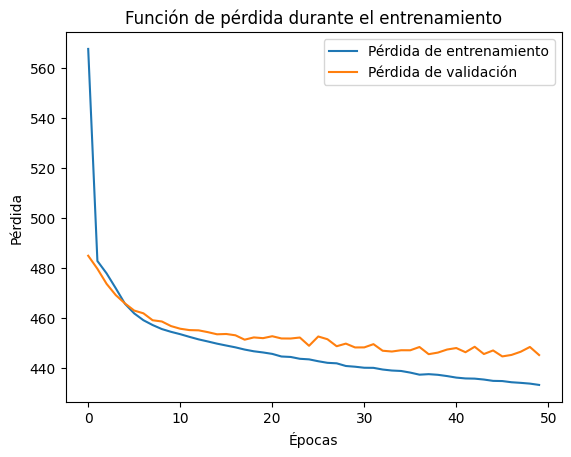

In [20]:
#se grafica la evolución de la función de pérdida durante entrenamiento y validación, permitiendo visualizar cómo mejora el modelo a lo largo de las épocas.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


EVALUACION

In [21]:
# se evalúa el modelo con los datos de prueba y muestra el error absoluto medio MAE indicando qué tan precisa es la predicción de la popularidad de las canciones en promedio.
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en el conjunto test: {mae}")


713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 443.4296 - mae: 17.0877
MAE en el conjunto test: 17.010421752929688


PREDICCION

In [22]:
# se genera predicciones del modelo sobre los datos de prueba y crea un DataFrame que compara los valores reales con los predichos mostrando las primeras filas para revisión.
import pandas as pd

predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Actual  Predicted
0      50  42.115776
1      11   9.909489
2       0  11.152596
3       0  32.752052
4      57  41.299011


In [23]:
# solo busca canciones cuyo nombre contenga “Beso” en el dataframe y muestra sus nombres artistas y álbumes facilitando identificar coincidencias en el dataset.
nombre_cancion = "Beso"

canciones_df = df[df['track_name'].str.contains(nombre_cancion, case=False, na=False)]

print(f"Canciones encontradas:")
canciones_df[['track_name', 'artists', 'album_name']].head()


Canciones encontradas:


,track_name,artists,album_name
1655,Un Beso de Desayuno,Calle 13,Residente o Visitante
17425,Beso Con Baba,Meth Math;Dinamarca,m♡rtal
21293,Son Tus Besos,Cestar,El Verdadero Amor
23145,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,Toolroom Amsterdam 2022
23927,El Beso (feat. Mathieu Ruz),Dombresky;Crusy,El Beso (feat. Mathieu Ruz)


In [24]:
# aqui se toma una canción específica del dataset normaliza sus características y usa el modelo para predecir su popularidad mostrando el valor real y la predicción.
# indice a selecionar
i = 0
cancion = canciones_df.iloc[i]
X_input = cancion[features].values.reshape(1, -1)
X_input = scaler.transform(X_input)

prediccion = model.predict(X_input)[0][0]
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Canción: Un Beso de Desayuno - Calle 13
Popularidad real: 20
Predicción: 35.93


OTRAS METRICAS

In [25]:
# calcula métricas de rendimiento del modelo de regresión R² indica qué proporción de la variabilidad de la popularidad se explica con el modelo MSE muestra el error cuadrático medio, evaluando la precisión de las predicciones.


from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.10981273651123047
MSE: 439.2904357910156
